Markus Hjelland: 267195  
Dag Ruben Nordhus: ......

In [2]:
import matplotlib.pyplot as plt
import random as rng
import numpy as np

# Asignment 3

## Introduction

### Task 0

In [ ]:
def create_box(x, y, z): # This function simply creates a numpy array with the desired dimensions of the box.
    
    return np.array([float(x), float(y), float(z)])


box = create_box(1, 1, 1) # Creating a box of sidelengths 1, for simplicity.

### Task 1

In [ ]:
def create_points(N, box): # This function creates N random points within the volume of the box. I let it be able to create several points, as this is usefull later.
    
    points = []

    for i in range(N):
        x = rng.uniform(0, box[0])
        y = rng.uniform(0, box[1])
        z = rng.uniform(0, box[2])

        points.append(np.array([x, y, z]))

    return np.array(points) # The output is a numpy array of numpy arrays.

### Task 2

In [412]:
class Sphere: # Creating a sphere class. This makes it easier to handle the spheres later.
    def __init__(self, center, radius): # A sphere is defined by it's center point and it's radius.
        self.center = center
        self.radius = radius


def create_sphere(box):

    ''' I decided to first generate a random point inside the box (using create_points). Then finding the maximum radius the sphere could have, 
    while staying inside the box, based on the distance to each of the 'walls' of the box. The radius is a random number between this and 0.
    I then return an object from the sphere class above, with the generated center and radius.'''

    center = create_points(1, box)
    distances_from_walls = [center[0, 0], box[0] - center[0, 0], center[0, 1], box[1] - center[0, 1], center[0, 2], box[2] - center[0, 2]]
    radius = rng.uniform(0, min(distances_from_walls))

    return Sphere(center, radius)


sphere = create_sphere(box)

### Task 3

In [392]:
def inside_sphere(point, center, radius): # This function checks wether a point is inside the sphere or not based on the point, the sphere center, the sphere radius and the sphere function. It returns a boolean value.

    if (point[0] - center[0, 0])**2 + (point[1] - center[0, 1])**2 + (point[2] - center[0, 2])**2 <= radius**2:
        return True
    else:
        return False

### Task 4

866 out of 100000 points is inside the sphere (0.87%).


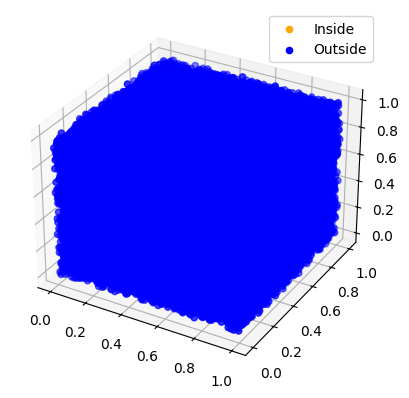

In [439]:
def sort_points(points, center, radius): # A function to sort the inside and outside points in two different lists.
    
    inside_points = []
    outside_points = []

    for point in points: # Checking each point and adding to corresponding list.
        if inside_sphere(point, center, radius):
            inside_points.append(point)
        else:
            outside_points.append(point)

    ratio = len(inside_points)/(len(inside_points) + len(outside_points)) # The ratio of inside points to total points.
    print(f'{len(inside_points)} out of {len(inside_points) + len(outside_points)} points is inside the sphere ({round(ratio*100, 2)}%).')

    return np.array(inside_points), np.array(outside_points), ratio


def scatter_plot(inside_points, outside_points): # A function that handles all the plotting.
    ax = plt.figure().add_subplot(projection='3d')
    
    if len(inside_points) > 0: 
        ax.scatter(inside_points[:,0], inside_points[:,1], inside_points[:,2], color='orange', label='Inside')
    if len(outside_points) > 0: 
        ax.scatter(outside_points[:,0], outside_points[:,1], outside_points[:,2], color='blue', label='Outside')
    
    plt.legend()
    plt.show()


points = create_points(100000, box) # Creating points inside the box.
inside_points, outside_points, ratio = sort_points(points, sphere.center, sphere.radius) # Using the sort_points with the check_inside function to define the list of inside and outside points.

scatter_plot(inside_points, outside_points) # Then, plotting it:

When plotting many points, the orange sphere of inside points becomes hidden. If we wish to see it, we can simply comment out the plotting of the blue outside points

Checking wether I'm right...

### Task 5

In [440]:
total_volume = box[0]*box[1]*box[2]
sphere_volume_estimate = total_volume * ratio

pi_estimate = (3/4)*(sphere_volume_estimate/radius**3)
print(pi_estimate)


0.26345246203810696


### Task 6

In [443]:
spheres = []

for i in range(10):
    sphere = create_sphere(box)
    spheres.append(sphere)

### Task 7